In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset = pd.read_csv('C:\\Users\\USER\\Desktop\\FCUP - Doutoramento\\PHD_Thesis_Git_Code\\WTCCC\\table_study_cases_control_with_scores_and_new_controls.csv')

In [3]:
copy = dataset
copy['cohort'] = copy['cohort'].map({'case': 1 ,'control': 0})
dummy_dataset = copy.drop(columns=['patient', 'Age', 'Region', 'Gender'])
dummy_dataset = pd.get_dummies(dummy_dataset)

In [4]:
dummy_dataset_case = dummy_dataset[(dummy_dataset['cohort'] == 0)]
dummy_dataset_control = dummy_dataset[dummy_dataset['cohort'] == 1]

,cohort,rs1523041_CC-1,rs1523041_CG-1,rs1523041_GG-1,score1_<= 0.2-1,score1_[0.2-0.4]-1,score1_[0.4-0.6]-1,score1_[0.6-0.8]-1,score1_[0.8-0.9]-1,score1_[0.9-1.0]-1,...,score6_[0.8-0.9]-6,score6_[0.9-1.0]-6,rs9621532_AA-7,rs9621532_AC-7,rs9621532_CC-7,score7_<= 0.2-7,score7_[0.4-0.6]-7,score7_[0.6-0.8]-7,score7_[0.8-0.9]-7,score7_[0.9-1.0]-7
cohort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs1523041_CC-1,NaN,1.000000,-0.759582,-0.311191,-0.020318,-0.014364,-0.003194,-0.014364,-0.020318,0.030613,...,-0.014364,0.014084,0.028273,-0.024522,-0.023831,-0.019867,NaN,NaN,-0.020318,0.027380
rs1523041_CG-1,NaN,-0.759582,1.000000,-0.381742,0.000912,0.018911,-0.030530,-0.017621,0.000912,0.016353,...,0.018911,-0.001826,-0.013362,0.007295,0.036262,0.031434,NaN,NaN,0.026748,-0.040619
rs1523041_GG-1,NaN,-0.311191,-0.381742,1.000000,0.027539,-0.007219,0.049148,0.046159,0.027539,-0.067396,...,-0.007219,-0.017346,-0.020653,0.024188,-0.019119,-0.017698,NaN,NaN,-0.010211,0.020442
score1_<= 0.2-1,NaN,-0.020318,0.000912,0.027539,1.000000,-0.000471,-0.000817,-0.000471,-0.000667,-0.470854,...,-0.000471,-0.249083,0.008051,-0.007934,-0.001248,-0.001155,NaN,NaN,-0.000667,0.001335
score1_[0.2-0.4]-1,NaN,-0.014364,0.018911,-0.007219,-0.000471,1.000000,-0.000577,-0.000333,-0.000471,-0.332889,...,-0.000333,0.000944,0.005692,-0.005609,-0.000883,-0.000817,NaN,NaN,-0.000471,0.000944
score1_[0.4-0.6]-1,NaN,-0.003194,-0.030530,0.049148,-0.000817,-0.000577,1.000000,-0.000577,-0.000817,-0.576772,...,-0.000577,0.001635,0.009862,-0.009719,-0.001529,-0.001415,NaN,NaN,-0.000817,0.001635
score1_[0.6-0.8]-1,NaN,-0.014364,-0.017621,0.046159,-0.000471,-0.000333,-0.000577,1.000000,-0.000471,-0.332889,...,-0.000333,0.000944,0.005692,-0.005609,-0.000883,-0.000817,NaN,NaN,-0.000471,0.000944
score1_[0.8-0.9]-1,NaN,-0.020318,0.000912,0.027539,-0.000667,-0.000471,-0.000817,-0.000471,1.000000,-0.470854,...,-0.000471,0.001335,-0.037379,0.038046,-0.001248,-0.001155,NaN,NaN,-0.000667,0.001335
score1_[0.9-1.0]-1,NaN,0.030613,0.016353,-0.067396,-0.470854,-0.332889,-0.576772,-0.332889,-0.470854,1.000000,...,0.001001,0.115351,0.004342,-0.004850,0.002651,0.002454,NaN,NaN,0.001416,-0.002835


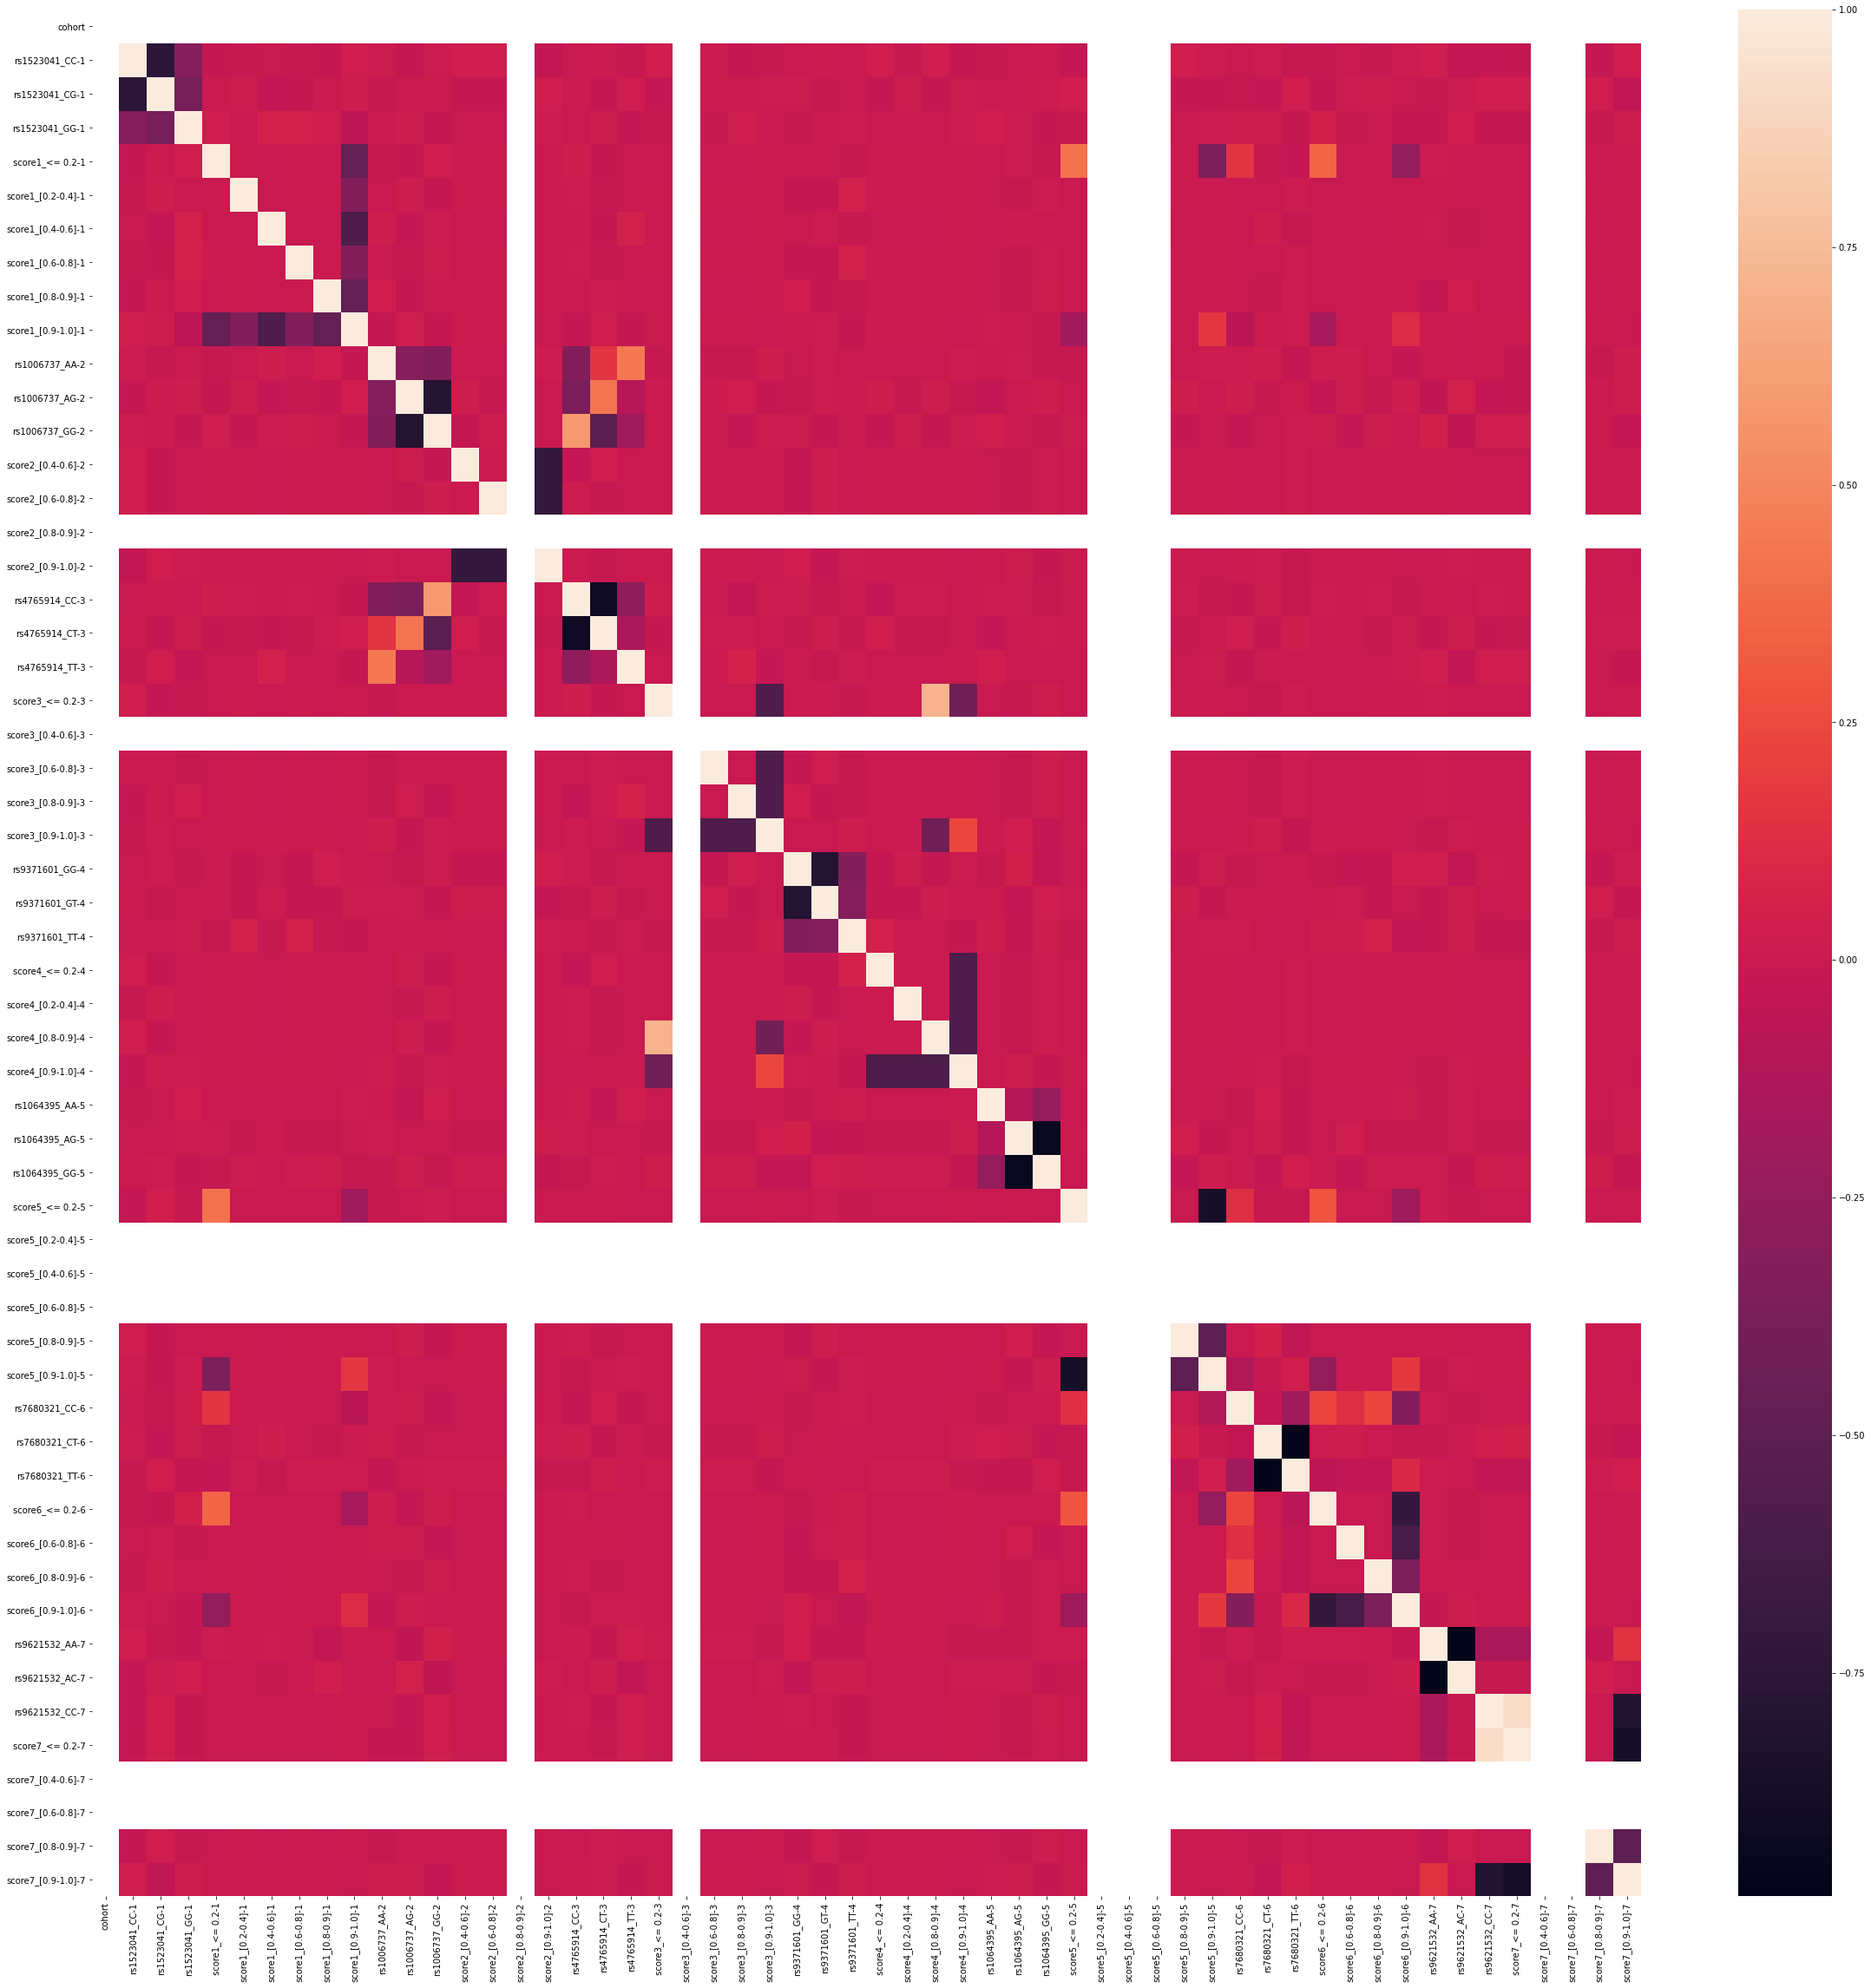

In [5]:
from matplotlib.colors import ListedColormap

corrMatrix_case_spearman = dummy_dataset_case.corr(method="spearman")
plt.figure(figsize=(40,40))

#corrMatrix_pos = corrMatrix_case[corrMatrix_case >= 0]

#print(corrMatrix_pos.shape)
display(corrMatrix_case_spearman)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix_case_spearman)
plt.savefig('correlation_matrix_positives_case_spearman.png', facecolor='white', transparent=False)
plt.show()

,cohort,rs1523041_CC-1,rs1523041_CG-1,rs1523041_GG-1,score1_<= 0.2-1,score1_[0.2-0.4]-1,score1_[0.4-0.6]-1,score1_[0.6-0.8]-1,score1_[0.8-0.9]-1,score1_[0.9-1.0]-1,...,score6_[0.8-0.9]-6,score6_[0.9-1.0]-6,rs9621532_AA-7,rs9621532_AC-7,rs9621532_CC-7,score7_<= 0.2-7,score7_[0.4-0.6]-7,score7_[0.6-0.8]-7,score7_[0.8-0.9]-7,score7_[0.9-1.0]-7
cohort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs1523041_CC-1,NaN,1.000000,-0.738118,-0.340272,-0.025725,NaN,NaN,-0.018115,0.006738,0.023889,...,-0.018115,-0.006738,0.047179,-0.044035,-0.018915,-0.018915,0.039102,-0.018115,-0.031392,0.018926
rs1523041_CG-1,NaN,-0.738118,1.000000,-0.383251,-0.050041,NaN,NaN,-0.020403,0.002928,0.046321,...,0.024543,-0.002928,-0.051362,0.054359,-0.010055,-0.025973,-0.028862,0.024543,0.016568,0.016334
rs1523041_GG-1,NaN,-0.340272,-0.383251,1.000000,0.104962,NaN,NaN,0.053238,-0.013305,-0.097264,...,-0.009406,0.013305,0.006997,-0.015478,0.039910,0.062096,-0.013305,-0.009406,0.019886,-0.048676
score1_<= 0.2-1,NaN,-0.025725,-0.050041,0.104962,1.000000,NaN,NaN,-0.001228,-0.001737,-0.815882,...,-0.001228,0.001737,-0.040842,0.011936,0.141365,0.141365,-0.001737,-0.001228,-0.002128,-0.105048
score1_[0.2-0.4]-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score1_[0.4-0.6]-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score1_[0.6-0.8]-1,NaN,-0.018115,-0.020403,0.053238,-0.001228,NaN,NaN,1.000000,-0.000708,-0.332665,...,-0.000501,0.000708,0.007669,-0.007505,-0.001419,-0.001419,-0.000708,-0.000501,-0.000868,0.001880
score1_[0.8-0.9]-1,NaN,0.006738,0.002928,-0.013305,-0.001737,NaN,NaN,-0.000708,1.000000,-0.470577,...,-0.000708,0.001002,-0.040759,0.041886,-0.002007,-0.002007,-0.001002,-0.000708,-0.001228,0.002659
score1_[0.9-1.0]-1,NaN,0.023889,0.046321,-0.097264,-0.815882,NaN,NaN,-0.332665,-0.470577,1.000000,...,0.001505,-0.002129,0.050058,-0.027027,-0.114090,-0.114090,0.002129,0.001505,0.002609,0.083952


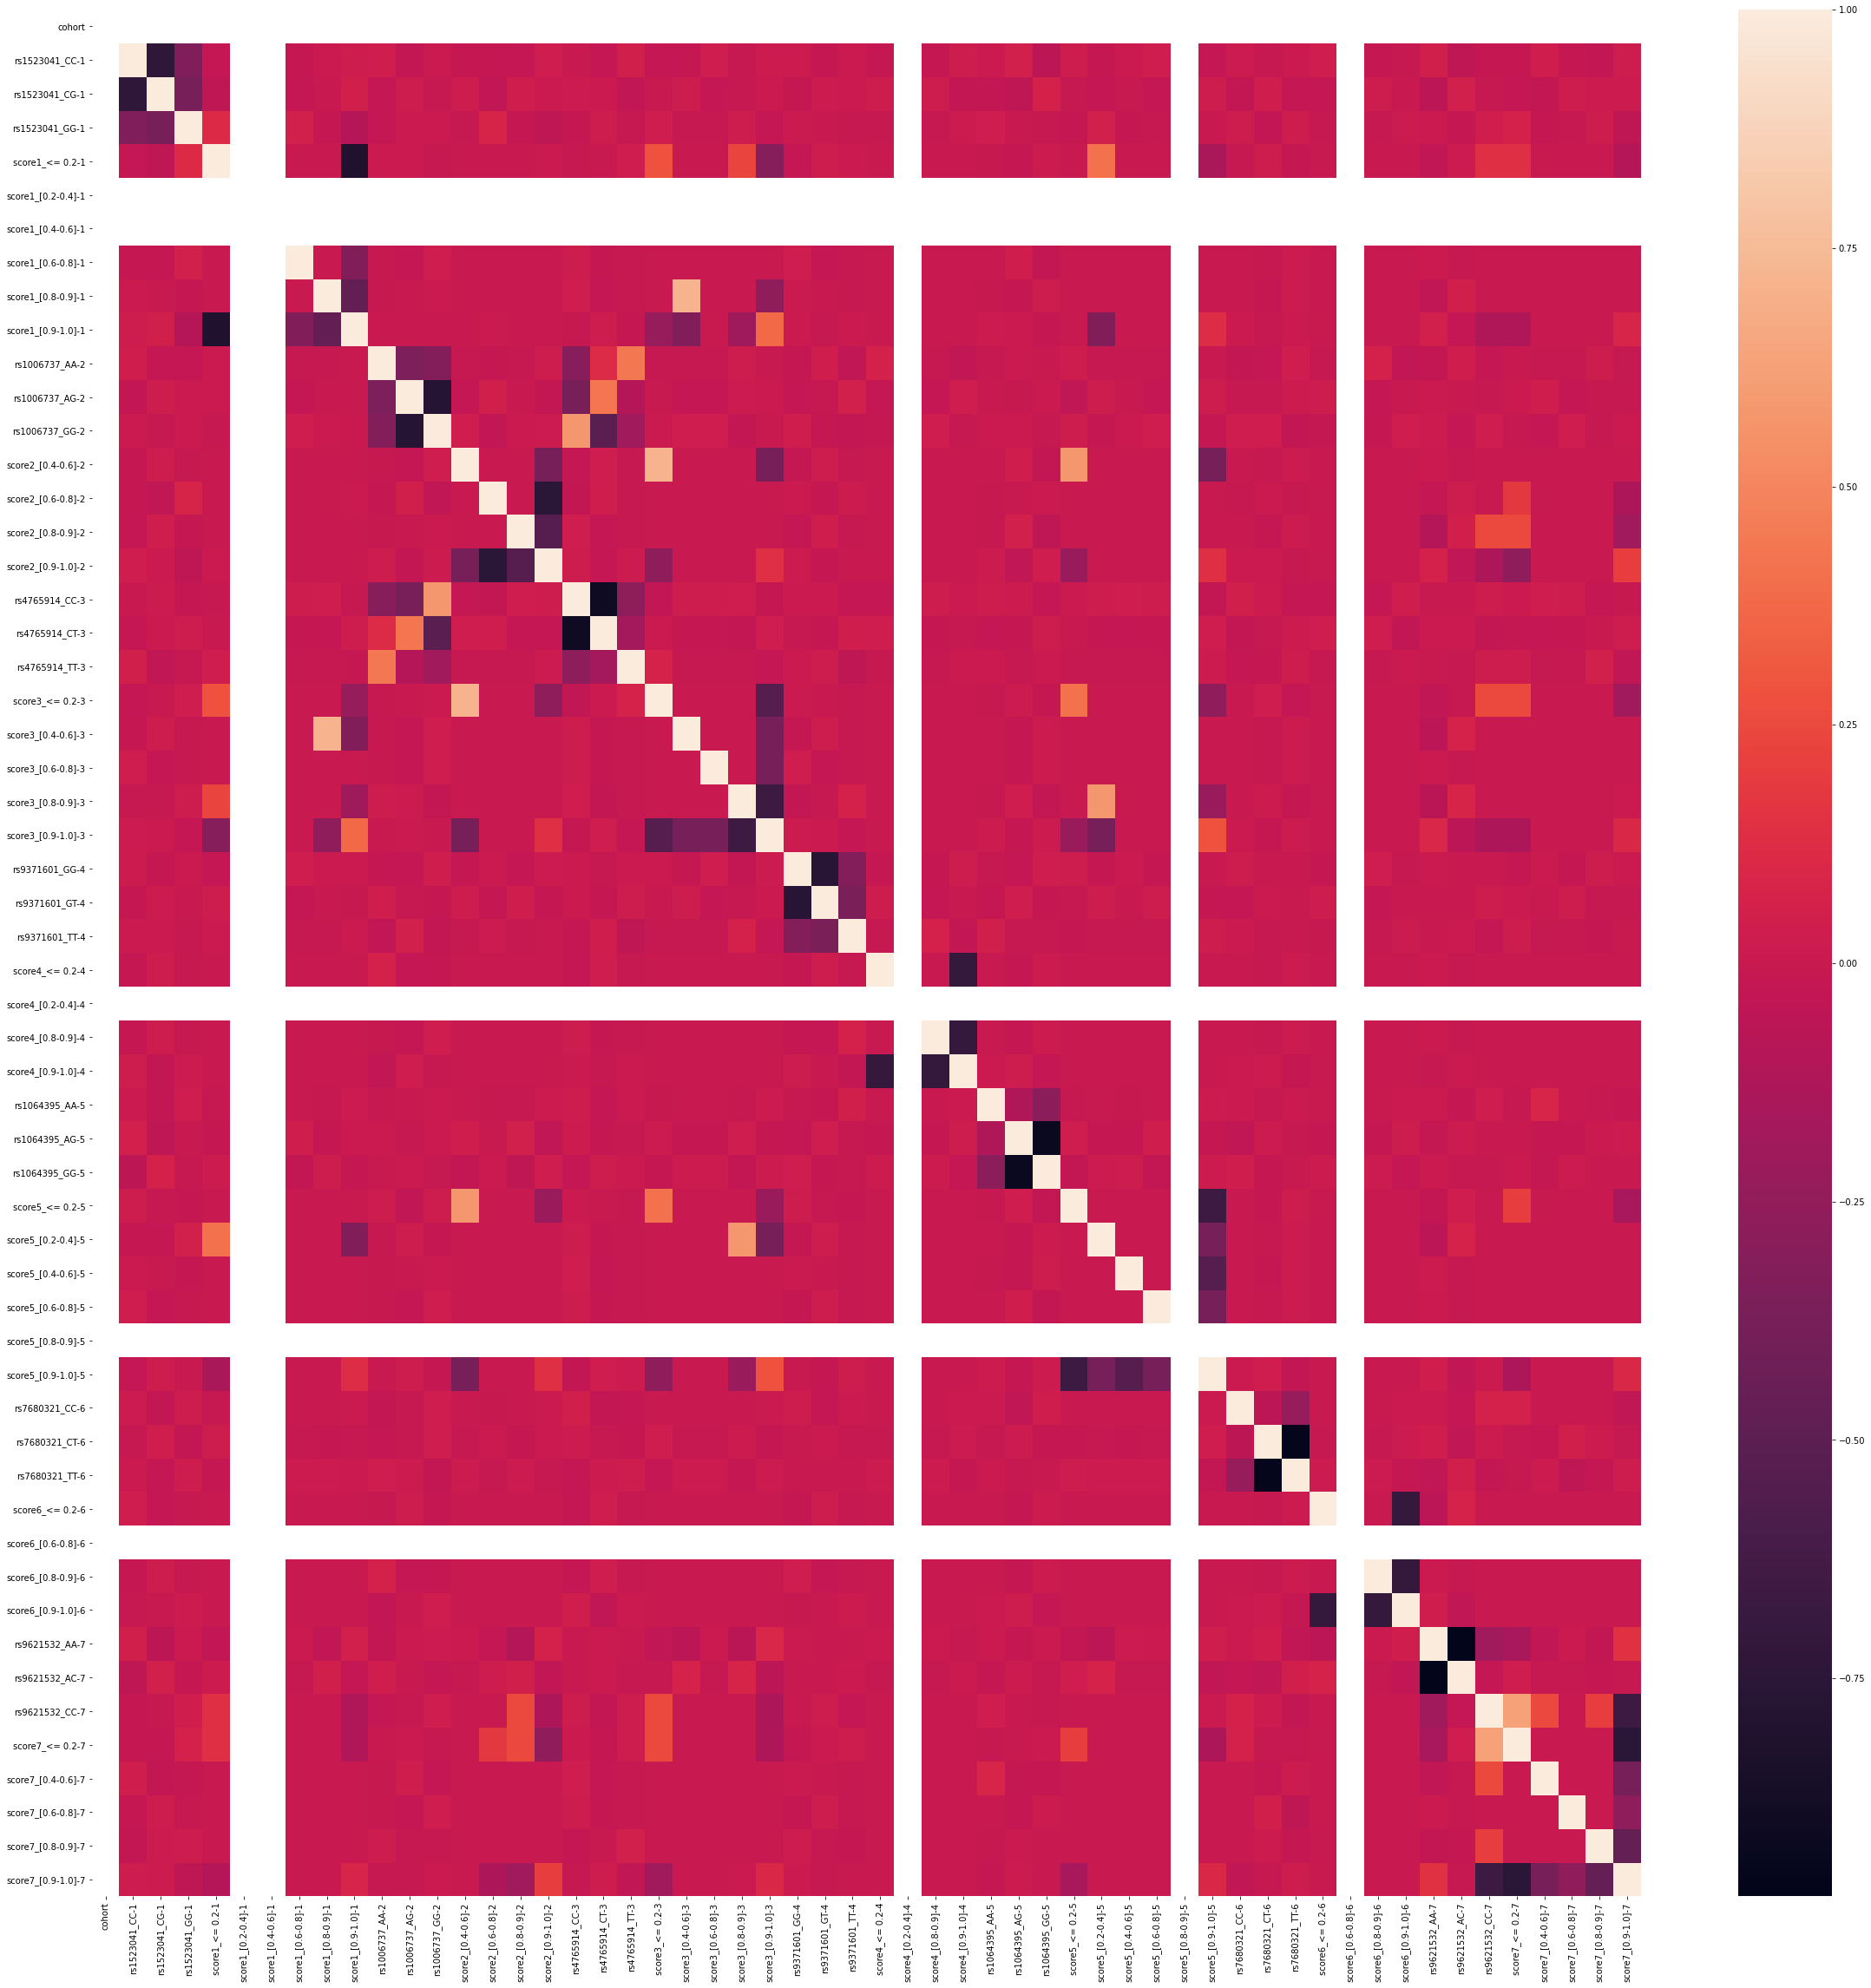

In [6]:
from matplotlib.colors import ListedColormap

corrMatrix_control_spearman = dummy_dataset_control.corr(method="spearman")
plt.figure(figsize=(40,40))

#corrMatrix_pos = corrMatrix_case[corrMatrix_case >= 0]

#print(corrMatrix_pos.shape)
display(corrMatrix_control_spearman)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix_control_spearman)
plt.savefig('correlation_matrix_control_spearman.png', facecolor='white', transparent=False)
plt.show()

In [7]:
tuples_case_spearman = []
test_sad_case_spearman = []
cohort_case_tuples_spearman = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_case_spearman.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_case_spearman.append([(x,y) for x,y in zip(corrMatrix_case_spearman.iloc[0].index, corrMatrix_case_spearman.iloc[i])])

for a_tuple in tuples_case_spearman:
    for i in range(0, len(tuples_case_spearman)):
        cohort_case_tuples_spearman.append(a_tuple[i])

for a_tuple in cohort_case_tuples_spearman:
    test_sad_case_spearman.append(a_tuple[1])

print(test_sad_case_spearman)


tuples_control_spearman = []
test_sad_control_spearman = []
cohort_control_tuples_spearman = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_control_spearman.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_control_spearman.append([(x,y) for x,y in zip(corrMatrix_control_spearman.iloc[0].index, corrMatrix_control_spearman.iloc[i])])

for a_tuple in tuples_control_spearman:
    for i in range(0, len(tuples_control_spearman)):
        cohort_control_tuples_spearman.append(a_tuple[i])

for a_tuple in cohort_control_tuples_spearman:
    test_sad_control_spearman.append(a_tuple[1])

print(test_sad_control_spearman)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976931, -0.3111908019799922, -0.020317508475825186, -0.014364254177178569, -0.0031940933174453992, -0.014364254177178569, -0.020317508475825186, 0.03061283513179346, 0.008742903038393689, -0.016112882383987188, 0.010356431737021351, 0.023198020247812777, 0.023198020247812777, nan, -0.03281242222489538, -0.0011620267045973937, 0.006753611893685552, -0.013044006801911331, 0.03281242222489538, nan, 0.0062474568745350964, -0.020317508475825186, -0.010828133888573446, -0.004608918049135392, 0.007085355995913095, -0.003850552321595176, 0.023198020247812777, -0.014364254177178569, 0.023198020247812777, -0.018499726001493716, -0.010160659220187045, -0.0011636007896767585, 0.004589605614099207, -

In [10]:
tuples_v2_case_spearman = []
for col in corrMatrix_case_spearman.columns:
    for i in range(0, len(corrMatrix_case_spearman.iloc[0].index)):
        tuples_v2_case_spearman.append((corrMatrix_case_spearman.iloc[0].index[i],col ))

tuples_v2_control_spearman = []
for col in corrMatrix_control_spearman.columns:
    for i in range(0, len(corrMatrix_control_spearman.iloc[0].index)):
        tuples_v2_control_spearman.append((corrMatrix_control_spearman.iloc[0].index[i],col ))

In [14]:
df_case_spearman = pd.DataFrame(index=range(len(tuples_v2_case_spearman)), columns=['correlation'])

df_case_spearman.index = tuples_v2_case_spearman
df_case_spearman['correlation'] = test_sad_case_spearman


case_spearman_study = df_case_spearman.dropna()
case_spearman_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.759582
"(rs1523041_GG-1, rs1523041_CC-1)",-0.311191
"(score1_<= 0.2-1, rs1523041_CC-1)",-0.020318
"(score1_[0.2-0.4]-1, rs1523041_CC-1)",-0.014364
...,...
"(rs9621532_AC-7, score7_[0.9-1.0]-7)",-0.007129
"(rs9621532_CC-7, score7_[0.9-1.0]-7)",-0.801293
"(score7_<= 0.2-7, score7_[0.9-1.0]-7)",-0.865736
"(score7_[0.8-0.9]-7, score7_[0.9-1.0]-7)",-0.499500


In [15]:
df_control_spearman = pd.DataFrame(index=range(len(tuples_v2_control_spearman)), columns=['correlation'])

df_control_spearman.index = tuples_v2_control_spearman
df_control_spearman['correlation'] = test_sad_control_spearman


control_spearman_study = df_control_spearman.dropna()
control_spearman_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.738118
"(rs1523041_GG-1, rs1523041_CC-1)",-0.340272
"(score1_<= 0.2-1, rs1523041_CC-1)",-0.025725
"(score1_[0.6-0.8]-1, rs1523041_CC-1)",-0.018115
...,...
"(score7_<= 0.2-7, score7_[0.9-1.0]-7)",-0.754788
"(score7_[0.4-0.6]-7, score7_[0.9-1.0]-7)",-0.376827
"(score7_[0.6-0.8]-7, score7_[0.9-1.0]-7)",-0.266390
"(score7_[0.8-0.9]-7, score7_[0.9-1.0]-7)",-0.461632


In [16]:
case_spearman_ordered = case_spearman_study[(case_spearman_study['correlation'] > 0.5) & (case_spearman_study['correlation'] < 1.0)]
case_spearman_ordered['correlation'].sort_values()

,correlation
"(rs4765914_CC-3, rs1006737_GG-2)",0.581769
"(rs1006737_GG-2, rs4765914_CC-3)",0.581769
"(score4_[0.8-0.9]-4, score3_<= 0.2-3)",0.706989
"(score3_<= 0.2-3, score4_[0.8-0.9]-4)",0.706989
"(score7_<= 0.2-7, rs9621532_CC-7)",0.925666
"(rs9621532_CC-7, score7_<= 0.2-7)",0.925666


In [21]:
control_spearman_ordered =  control_spearman_study[(control_spearman_study['correlation'] > 0.5) & (control_spearman_study['correlation'] < 1.0)]
control_spearman_ordered['correlation'].sort_values()

(score5_<= 0.2-5, score2_[0.4-0.6]-2)       0.577061
(score5_[0.2-0.4]-5, score3_[0.8-0.9]-3)    0.577061
(score2_[0.4-0.6]-2, score5_<= 0.2-5)       0.577061
(score3_[0.8-0.9]-3, score5_[0.2-0.4]-5)    0.577061
(rs4765914_CC-3, rs1006737_GG-2)            0.581903
(rs1006737_GG-2, rs4765914_CC-3)            0.581903
(score7_<= 0.2-7, rs9621532_CC-7)           0.623492
(rs9621532_CC-7, score7_<= 0.2-7)           0.623492
(score3_[0.4-0.6]-3, score1_[0.8-0.9]-1)    0.706930
(score3_<= 0.2-3, score2_[0.4-0.6]-2)       0.706930
(score2_[0.4-0.6]-2, score3_<= 0.2-3)       0.706930
(score1_[0.8-0.9]-1, score3_[0.4-0.6]-3)    0.706930
Name: correlation, dtype: float64

In [19]:
case_spearman_study[(case_spearman_study['correlation'] < -0.5) & (case_spearman_study['correlation'] > -1.0)]

,correlation
"(rs1523041_CG-1, rs1523041_CC-1)",-0.759582
"(rs1523041_CC-1, rs1523041_CG-1)",-0.759582
"(score1_[0.9-1.0]-1, score1_[0.4-0.6]-1)",-0.576772
"(score1_[0.4-0.6]-1, score1_[0.9-1.0]-1)",-0.576772
"(rs1006737_GG-2, rs1006737_AG-2)",-0.793477
"(rs1006737_AG-2, rs1006737_GG-2)",-0.793477
"(rs4765914_CT-3, rs1006737_GG-2)",-0.518497
"(score2_[0.9-1.0]-2, score2_[0.4-0.6]-2)",-0.706989
"(score2_[0.9-1.0]-2, score2_[0.6-0.8]-2)",-0.706989
"(score2_[0.4-0.6]-2, score2_[0.9-1.0]-2)",-0.706989


In [20]:
control_spearman_study[(control_spearman_study['correlation'] < -0.5) & (control_spearman_study['correlation'] > -1.0)]

,correlation
"(rs1523041_CG-1, rs1523041_CC-1)",-0.738118
"(rs1523041_CC-1, rs1523041_CG-1)",-0.738118
"(score1_[0.9-1.0]-1, score1_<= 0.2-1)",-0.815882
"(score1_<= 0.2-1, score1_[0.9-1.0]-1)",-0.815882
"(rs1006737_GG-2, rs1006737_AG-2)",-0.778701
"(rs1006737_AG-2, rs1006737_GG-2)",-0.778701
"(rs4765914_CT-3, rs1006737_GG-2)",-0.511575
"(score2_[0.9-1.0]-2, score2_[0.6-0.8]-2)",-0.755360
"(score2_[0.9-1.0]-2, score2_[0.8-0.9]-2)",-0.533853
"(score2_[0.6-0.8]-2, score2_[0.9-1.0]-2)",-0.755360
